In [1]:

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 3s 1us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
len(train_labels)


60000

In [9]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

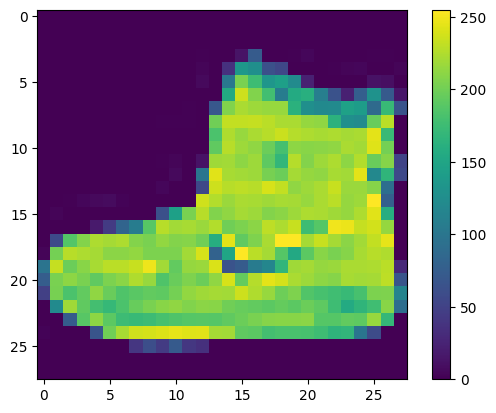

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
train_images = train_images / 255.0
test_images = test_images / 255.0

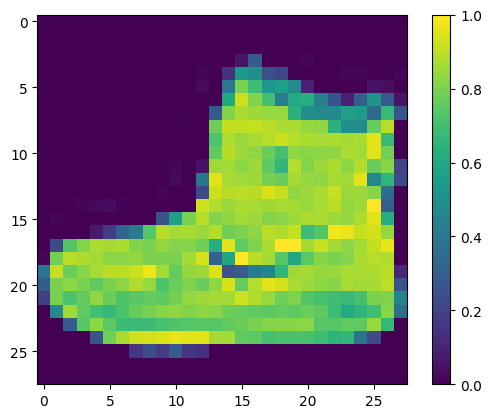

In [12]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

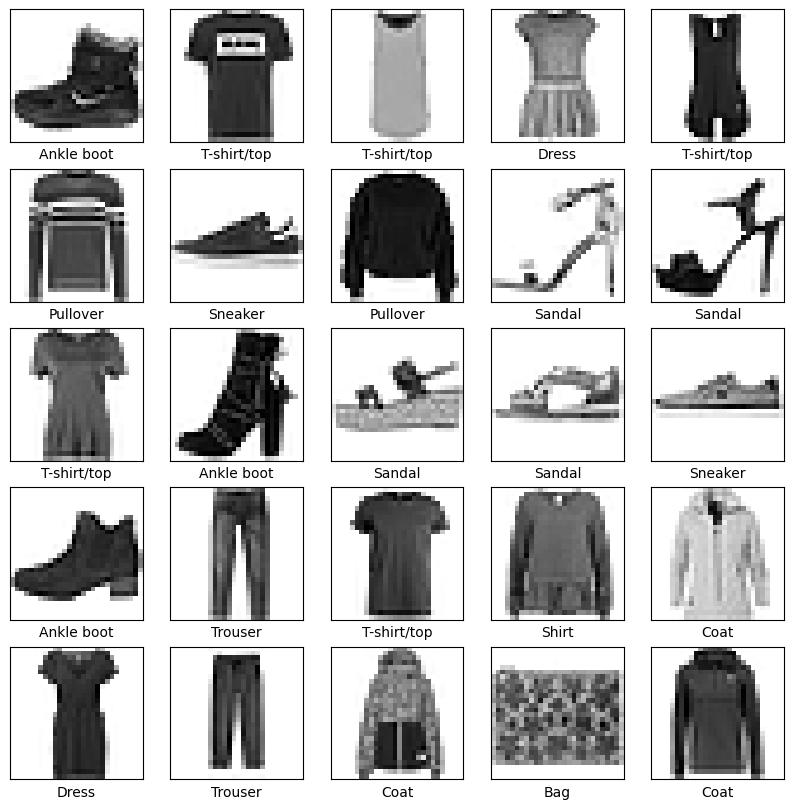

In [18]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [19]:
model = tf.keras.Sequential([
tf.keras.layers.Flatten(input_shape=(28, 28)),
tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dense(10)
])

In [20]:
model.compile(optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=['accuracy'])

In [24]:
history = model.fit(
train_images,
train_labels,
epochs=10,
batch_size=32,
validation_data=(test_images, test_labels)
)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1420 - accuracy: 0.9460 - val_loss: 0.4327 - val_accuracy: 0.8876
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1400 - accuracy: 0.9477 - val_loss: 0.4677 - val_accuracy: 0.8781
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1366 - accuracy: 0.9488 - val_loss: 0.4365 - val_accuracy: 0.8849
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1325 - accuracy: 0.9504 - val_loss: 0.4592 - val_accuracy: 0.8847
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1308 - accuracy: 0.9515 - val_loss: 0.4484 - val_accuracy: 0.8839
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1320 - accuracy: 0.9510 - val_loss: 0.4745 - val_accuracy: 0.8780
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1294 - accuracy: 0.9517 - val_loss: 0.4475 - val_accuracy:

In [25]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.4756 - accuracy: 0.8828 - 729ms/epoch - 2ms/step

Test accuracy: 0.8827999830245972


In [26]:
probability_model = tf.keras.Sequential([model,
tf.keras.layers.Softmax()])

In [27]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [28]:
predictions[0]

array([2.93067092e-19, 7.04810691e-22, 3.09595594e-22, 7.66833875e-26,
       7.24134917e-25, 9.22620591e-11, 9.50721278e-18, 1.33437545e-08,
       2.73749608e-19, 1.00000000e+00], dtype=float32)

In [29]:
np.argmax(predictions[0])

9

In [30]:
test_labels[0]

9

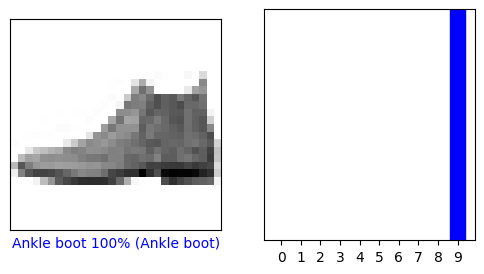

In [36]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()


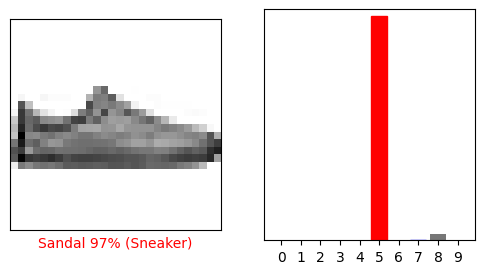

In [37]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()


(28, 28)
(1, 28, 28)
1/1 [==============================] - 0s 29ms/step
[[2.9306709e-19 7.0480802e-22 3.0959441e-22 7.6683098e-26 7.2413768e-25
  9.2262059e-11 9.5072128e-18 1.3343779e-08 2.7375067e-19 1.0000000e+00]]


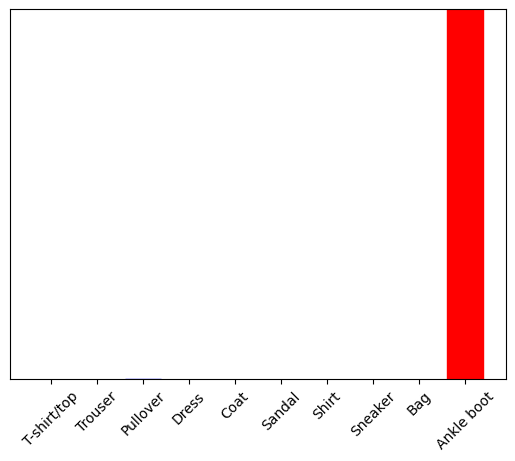

In [39]:
img = test_images[0]
print(img.shape)

# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))
print(img.shape)

predictions_single = probability_model.predict(img)
print(predictions_single)

plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()